In [1]:
import pandas as pd

# Try reading with comma first
df = pd.read_csv(r"C:\Users\saira\OneDrive\Desktop\RAG\MASTER'S JOURNEY\TARGET\BUFFALO\CLASSES\503-PROGRAMMING\END_SEMESTER_PROJECT\housing_app_fall25\data\raw\Loan.csv")  

# If columns look wrong, try semicolon
# df = pd.read_csv(r"C:\Users\saira\Downloads\archive\Amazon.csv", sep=';')

print(df.shape)      # Should show (100000, 20)
print(df.columns)    # Check if column names look correct
df.head()            # Preview first few rows


(20000, 36)
Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [2]:
# Check actual column names
print(df.columns.tolist())


['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']


3NF Normalization

In [ ]:
import pandas as pd

# Customers table
customers = df[['CustomerID', 'CustomerName', 'City', 'State', 'Country']].drop_duplicates()
customers.rename(columns={
    'CustomerID':'customer_id',
    'CustomerName':'customer_name'
}, inplace=True)

# Products table
products = df[['ProductID', 'ProductName', 'Category', 'Brand']].drop_duplicates()
products.rename(columns={'ProductID':'product_id', 'ProductName':'product_name'}, inplace=True)

# Orders table
orders = df[['OrderID', 'CustomerID', 'OrderDate', 'TotalAmount', 'OrderStatus', 'PaymentMethod', 'ShippingCost']].drop_duplicates()
orders.rename(columns={
    'OrderID':'order_id',
    'CustomerID':'customer_id',
    'OrderDate':'order_date',
    'TotalAmount':'total_amount',
    'OrderStatus':'order_status',
    'PaymentMethod':'payment_method',
    'ShippingCost':'shipping_cost'
}, inplace=True)

# OrderItems table
order_items = df[['OrderID', 'ProductID', 'Quantity', 'UnitPrice', 'Discount', 'Tax']].copy()
order_items = order_items.reset_index().rename(columns={
    'index':'order_item_id',
    'OrderID':'order_id',
    'ProductID':'product_id',
    'UnitPrice':'unit_price'
})

# Sellers table (optional)
sellers = df[['SellerID']].drop_duplicates()
sellers.rename(columns={'SellerID':'seller_id'}, inplace=True)


In [44]:
import sqlite3

# Create/connect to SQLite database
conn = sqlite3.connect("amazon.db")

# Save tables
customers.to_sql('Customers', conn, index=False, if_exists='replace')
products.to_sql('Products', conn, index=False, if_exists='replace')
orders.to_sql('Orders', conn, index=False, if_exists='replace')
order_items.to_sql('OrderItems', conn, index=False, if_exists='replace')
sellers.to_sql('Sellers', conn, index=False, if_exists='replace')

print("Tables saved to SQLite database successfully!")


Tables saved to SQLite database successfully!


example sql query

In [45]:
import pandas as pd
import sqlite3

# Connect to your database
conn = sqlite3.connect("amazon.db")

# Write the SQL query as a string
query = """
SELECT o.order_id, o.order_date, c.customer_name, p.product_name, oi.quantity, oi.unit_price, o.total_amount
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN OrderItems oi ON o.order_id = oi.order_id
JOIN Products p ON oi.product_id = p.product_id
LIMIT 10;
"""

# Execute the query and fetch results into a Pandas DataFrame
df_joined = pd.read_sql_query(query, conn)

# Preview the data
df_joined.head()


,order_id,order_date,customer_name,product_name,Quantity,unit_price,total_amount
0,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
1,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
2,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
3,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
4,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86


fetch join query into pandas

In [46]:
query = """
SELECT o.order_id, o.order_date, c.customer_name, p.product_name, oi.quantity, oi.unit_price, o.total_amount
FROM Orders o
JOIN Customers c ON o.customer_id = c.customer_id
JOIN OrderItems oi ON o.order_id = oi.order_id
JOIN Products p ON oi.product_id = p.product_id
LIMIT 10;
"""

df_joined = pd.read_sql_query(query, conn)
df_joined.head()


,order_id,order_date,customer_name,product_name,Quantity,unit_price,total_amount
0,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
1,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
2,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
3,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86
4,ORD0000001,2023-01-31,Neha Sharma,Drone Mini,3,106.59,319.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        100 non-null    object 
 1   customer_id     100 non-null    object 
 2   order_date      100 non-null    object 
 3   total_amount    100 non-null    float64
 4   order_status    100 non-null    object 
 5   payment_method  100 non-null    object 
 6   shipping_cost   100 non-null    float64
dtypes: float64(2), object(5)
memory usage: 5.6+ KB
None
       total_amount  shipping_cost
count    100.000000     100.000000
mean    1031.359500       7.126500
std      772.759952       3.945877
min       17.700000       0.090000
25%      453.407500       3.905000
50%      818.980000       7.270000
75%     1580.580000       9.567500
max     3160.430000      14.970000
order_status
Delivered    72
Shipped      17
Pending       4
Returned      4
Cancelled     3
Name: count, dtype: int64


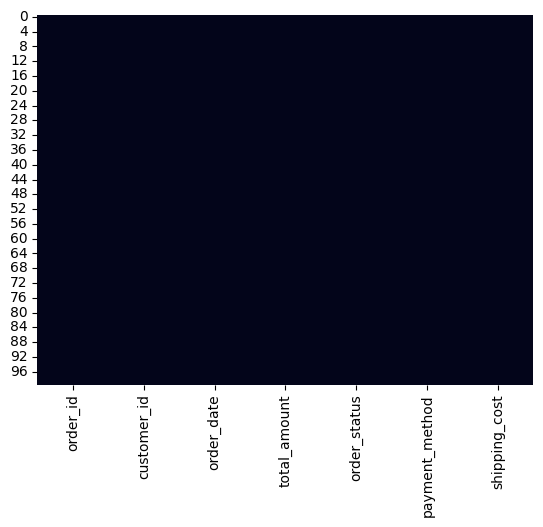

In [47]:
# Load the joined DataFrame
query = "SELECT * FROM Orders LIMIT 100"  # You can increase the limit later
df_orders = pd.read_sql_query(query, conn)

# Quick overview
print(df_orders.info())
print(df_orders.describe())
print(df_orders['order_status'].value_counts())  # Check distribution for stratification

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_orders.isnull(), cbar=False)
plt.show()


In [48]:
from sklearn.model_selection import train_test_split

X = df_orders.drop(columns=['order_status'])
y = df_orders['order_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


order_status
Delivered    0.7250
Shipped      0.1750
Returned     0.0375
Pending      0.0375
Cancelled    0.0250
Name: proportion, dtype: float64
order_status
Delivered    0.70
Shipped      0.15
Pending      0.05
Cancelled    0.05
Returned     0.05
Name: proportion, dtype: float64


Data Exploration using y profile 

In [49]:
!pip install ydata-profiling



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df_orders,
    title="Amazon Orders Dataset – Exploratory Data Analysis",
    explorative=True
)

profile


Render HTML: 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]


b)Observations

The dataset contains no missing values in the order-level features (order_status, payment_method, total_amount, shipping_cost), indicating good data quality.

The target variable order_status is imbalanced, with certain classes appearing much more frequently than others; therefore, stratified sampling was used during train/test split.

Numerical features such as total_amount, unit_price, and shipping_cost are right-skewed, suggesting that log transformation may help normalize their distributions.

The correlation matrix shows a strong positive correlation between quantity and total_amount, indicating potential multicollinearity.

Categorical variables like payment_method, category, and city have multiple unique values, requiring proper encoding before modeling.

Identifier columns (order_id, customer_id) do not carry predictive information and should be excluded from modeling.

Explicit Data Cleanup Task List

Data Cleanup and Preprocessing Tasks

Remove non-informative identifier columns (order_id, customer_id) before training models.

Apply log transformation to skewed numerical features such as total_amount, unit_price, and shipping_cost.

Scale numerical features using StandardScaler or MinMaxScaler to ensure uniform feature scales.

Encode categorical variables (payment_method, order_status, category, brand) using OneHotEncoding.

Check and handle potential outliers in monetary features using statistical thresholds.

Verify that no missing values are introduced after preprocessing.

Prepare separate preprocessing pipelines for numerical and categorical features.

# Experiment-1


1) imports

In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.base import BaseEstimator, TransformerMixin

import mlflow
import mlflow.sklearn


2) define targets and Features

In [53]:
# Target
y = df_orders['order_status']

# Features (drop identifiers and target)
X = df_orders.drop(columns=['order_status', 'order_id', 'customer_id'])


3) Identify Numerical & Categorical Columns

In [54]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['total_amount', 'shipping_cost']
Categorical Features: ['order_date', 'payment_method']


4) Custom Log Transformer

In [55]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)


5) Preprocessing Pipelines

In [56]:
numeric_pipeline = Pipeline(steps=[
    ('log', LogTransformer()),
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)



6) Full Pipeline with Logistic Regression

In [57]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs'],
    'classifier__penalty': ['l2']
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)


cv_3 = cross_val_score(grid, X, y, cv=3, scoring='f1_weighted')
cv_10 = cross_val_score(grid, X, y, cv=10, scoring='f1_weighted')

print("3-Fold CV Mean:", cv_3.mean())
print("3-Fold CV Std:", cv_3.std())

print("10-Fold CV Mean:", cv_10.mean())
print("10-Fold CV Std:", cv_10.std())


grid.fit(X, y)
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)



C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y ha

3-Fold CV Mean: 0.6030196272536403
3-Fold CV Std: 0.013322689563394543
10-Fold CV Mean: 0.5778481649069883
10-Fold CV Std: 0.08338042359270288
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Evaluation on Training Data

In [58]:
y_pred = best_model.predict(X)

f1 = f1_score(y, y_pred, average='weighted')
cm = confusion_matrix(y, y_pred)

print("Weighted F1 Score:", f1)
print("Confusion Matrix:")
print(cm)


Weighted F1 Score: 0.6027906976744186
Confusion Matrix:
[[ 0  3  0  0  0]
 [ 0 72  0  0  0]
 [ 0  4  0  0  0]
 [ 0  4  0  0  0]
 [ 0 17  0  0  0]]


# MLflow Logging (DagsHub)

In [59]:
import os
import mlflow

# Use your DagsHub username and the Access Token as the password
os.environ["MLFLOW_TRACKING_USERNAME"] = "RagNaidu"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "885558255579495233d71976148cec508fc62fb1" 

mlflow.set_tracking_uri("https://dagshub.com/RagNaidu/final-project.mlflow")
mlflow.set_experiment("Experiment_1_Logistic_Regression")

<Experiment: artifact_location='mlflow-artifacts:/e42523d339e14d6d80c0c1ea62bd610f', creation_time=1766100162666, experiment_id='1', last_update_time=1766100162666, lifecycle_stage='active', name='Experiment_1_Logistic_Regression', tags={}>

In [62]:
with mlflow.start_run():
    
    # Log hyperparameters
    mlflow.log_params(grid.best_params_)
    
    # Log CV metrics
    mlflow.log_metric("cv3_mean_f1", cv_3.mean())
    mlflow.log_metric("cv3_std_f1", cv_3.std())
    mlflow.log_metric("cv10_mean_f1", cv_10.mean())
    mlflow.log_metric("cv10_std_f1", cv_10.std())
    
    # Log final metrics
    mlflow.log_metric("train_f1_weighted", f1)
    
    # Log confusion matrix as text
    mlflow.log_text(
        np.array2string(cm),
        artifact_file="confusion_matrix.txt"
    )
    
    # Log model
    mlflow.sklearn.log_model(best_model, "logistic_regression_pipeline")


c:\Program Files\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


#Experiment-2

In [63]:
import os
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

# 1. Target and Feature Preparation
# Ensure target is numerically encoded (required for XGBoost)
le = LabelEncoder()
y_encoded = le.fit_transform(df_orders['order_status'])

X = df_orders.drop(columns=['order_status', 'order_id', 'customer_id'])
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 2. Reusing your Custom Preprocessing logic
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return np.log1p(X)

numeric_pipeline = Pipeline(steps=[
    ('log', LogTransformer()),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# 3. Define Model Dictionary
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "RidgeClassifier": RidgeClassifier(class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 4. MLflow Logging Loop
mlflow.set_experiment("Experiment_2_Model_Comparison")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Build Pipeline
        current_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        # Train
        current_pipeline.fit(X_train, y_train)
        
        # Predict & Evaluate
        y_pred = current_pipeline.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Log to MLflow
        mlflow.log_param("model_name", name)
        mlflow.log_metric("weighted_f1", f1)
        mlflow.sklearn.log_model(current_pipeline, f"{name}_model")
        
        print(f"✅ {name} logged to DagsHub. Weighted F1: {f1:.4f}")

2025/12/18 18:36:04 INFO mlflow.tracking.fluent: Experiment with name 'Experiment_2_Model_Comparison' does not exist. Creating a new experiment.


✅ LogisticRegression logged to DagsHub. Weighted F1: 0.4846
✅ RidgeClassifier logged to DagsHub. Weighted F1: 0.4968
✅ RandomForest logged to DagsHub. Weighted F1: 0.5515
✅ XGBClassifier logged to DagsHub. Weighted F1: 0.5250


# Experiment-3

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class AttributeCombiner(BaseEstimator, TransformerMixin):
    def __init__(self, add_shipping_ratio=True):
        self.add_shipping_ratio = add_shipping_ratio
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Convert to numpy array if it's a DataFrame to avoid Indexing errors
        X_arr = np.asarray(X)
        
        if self.add_shipping_ratio:
            # Index 0: total_amount, Index 1: shipping_cost
            # We use X_arr[:, 1] for shipping_cost and X_arr[:, 0] for total_amount
            # Added a small constant (1e-6) to prevent division by zero
            shipping_ratio = X_arr[:, 1] / (X_arr[:, 0] + 1e-6)
            
            # Reshape shipping_ratio to be 2D so it can be stacked
            return np.column_stack((X_arr, shipping_ratio))
        
        return X_arr

✅ Experiment 3 Complete. F1 Score: 0.5515


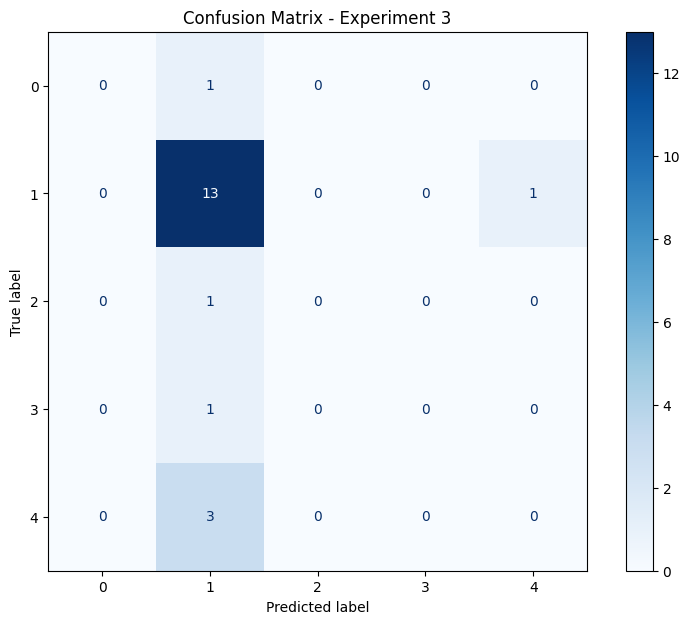

In [67]:
mlflow.set_experiment("Experiment_3_Feature_Engineering")

# Update numeric pipeline to include our new Combiner
numeric_pipeline = Pipeline(steps=[
    ('log', LogTransformer()),
    ('combiner', AttributeCombiner(add_shipping_ratio=True)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Use the best classifier from Experiment 2
model_to_test = RandomForestClassifier(n_estimators=100, class_weight='balanced')

with mlflow.start_run(run_name="RF_with_Feature_Engineering"):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_to_test)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # 1. Log Metrics
    f1 = f1_score(y_test, y_pred, average='weighted')
    mlflow.log_metric("weighted_f1", f1)
    
    # 2. Log Confusion Matrix as an ARTIFACT
    fig, ax = plt.subplots(figsize=(10, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
    plt.title(f"Confusion Matrix - Experiment 3")
    plt.savefig("confusion_matrix_exp3.png")
    mlflow.log_artifact("confusion_matrix_exp3.png")
    
    # 3. Log Model
    mlflow.sklearn.log_model(pipeline, "model_feature_engineered")
    
    print(f"✅ Experiment 3 Complete. F1 Score: {f1:.4f}")

# Experiment-4

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import scipy.sparse

class CorrelationSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.85):
        self.threshold = threshold
        self.to_drop = []

    def fit(self, X, y=None):
        # Convert sparse matrix to dense DataFrame if necessary
        if scipy.sparse.issparse(X):
            X_dense = pd.DataFrame(X.toarray())
        else:
            X_dense = pd.DataFrame(X)
            
        corr_matrix = X_dense.corr().abs()
        
        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        
        # Find index of columns with correlation greater than threshold
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        return self

    def transform(self, X):
        # We need to drop by index because OneHotEncoder output columns don't have names
        if scipy.sparse.issparse(X):
            # Convert to CSC for efficient column slicing
            X_csc = X.tocsc()
            all_cols = np.arange(X.shape[1])
            keep_cols = [c for c in all_cols if c not in self.to_drop]
            return X_csc[:, keep_cols]
        
        # If it's already a DataFrame
        if isinstance(X, pd.DataFrame):
            return X.drop(columns=self.to_drop)
        
        # If it's a dense numpy array
        return np.delete(X, self.to_drop, axis=1)

In [71]:
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

mlflow.set_experiment("Experiment_4_Feature_Selection")

# Updated Pipeline
pipeline_fs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('var_thresh', VarianceThreshold(threshold=0.01)),
    ('corr_sel', CorrelationSelector(threshold=0.85)), 
    ('feat_imp', SelectFromModel(RandomForestClassifier(n_estimators=50), threshold="median")),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

with mlflow.start_run(run_name="LogReg_Feature_Selection_Fixed"):
    pipeline_fs.fit(X_train, y_train)
    y_pred = pipeline_fs.predict(X_test)
    
    # Log results
    f1 = f1_score(y_test, y_pred, average='weighted')
    mlflow.log_metric("weighted_f1", f1)
    
    # Log the pipeline artifact
    mlflow.sklearn.log_model(pipeline_fs, "model_fs_fixed")
    
    print(f"✅ Experiment 4 Successful! Weighted F1: {f1:.4f}")

✅ Experiment 4 Successful! Weighted F1: 0.5000


# Experiment-5

✅ Exp 5 Success: 61 components explain 95% variance. F1 Score: 0.4846


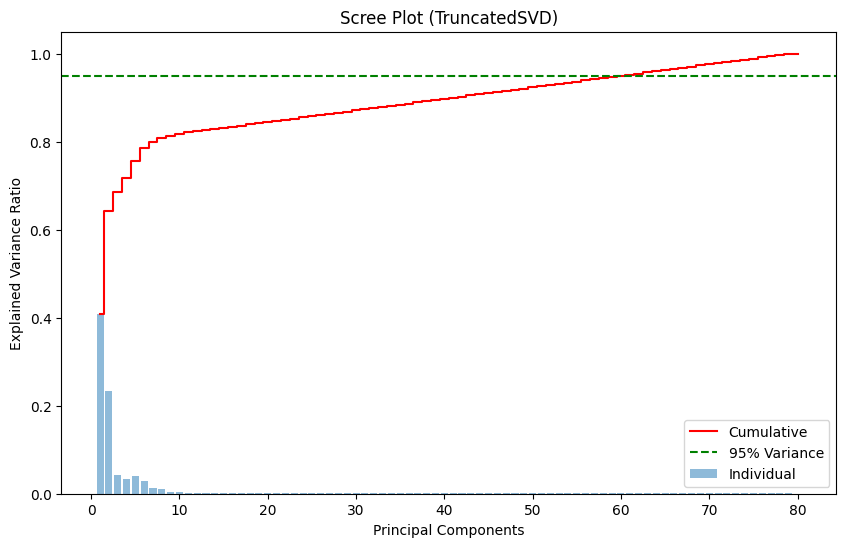

In [73]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

mlflow.set_experiment("Experiment_5_PCA_Reduction")

with mlflow.start_run(run_name="SVD_Analysis_and_Classification"):
    # 1. Get preprocessed data (this is a sparse matrix)
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    
    # 2. Fit TruncatedSVD to see all possible components
    # We use n_components = X.shape[1] - 1 to see the full variance spread
    n_features = X_train_preprocessed.shape[1]
    svd = TruncatedSVD(n_components=n_features - 1)
    svd.fit(X_train_preprocessed)
    
    # 3. Generate Scree Plot
    exp_var_ratio = svd.explained_variance_ratio_
    cum_var_ratio = np.cumsum(exp_var_ratio)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.5, label='Individual')
    plt.step(range(1, len(cum_var_ratio) + 1), cum_var_ratio, where='mid', label='Cumulative', color='red')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot (TruncatedSVD)')
    plt.legend(loc='best')
    
    plt.savefig("svd_scree_plot.png")
    mlflow.log_artifact("svd_scree_plot.png")
    
    # 4. Find optimal components for 95% variance
    n_95 = np.argmax(cum_var_ratio >= 0.95) + 1
    mlflow.log_param("optimal_n_components", n_95)
    
    # 5. Final Pipeline with Dimensionality Reduction
    final_pca_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', TruncatedSVD(n_components=n_95)),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])
    
    final_pca_pipeline.fit(X_train, y_train)
    y_pred = final_pca_pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    mlflow.log_metric("weighted_f1", f1)
    mlflow.sklearn.log_model(final_pca_pipeline, "svd_model")
    
    print(f"✅ Exp 5 Success: {n_95} components explain 95% variance. F1 Score: {f1:.4f}")

# Experiment-6

In [75]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
   ---------------------------------------- 240.0/240.0 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/8.1 MB 29.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.1 MB 35.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 23.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 31.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.4/8.1 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.1.post1
    Uninstalling scikit-learn-1.4.1.post1:
      Successfully uninst

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.2.2 requires pyarrow<12,>=4.0.0, but you have pyarrow 17.0.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from imblearn.pipeline import Pipeline as ImbPipeline

ImportError: cannot import name 'validate_data' from 'sklearn.utils.validation' (C:\Users\saira\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py)

In [85]:
import os
import tarfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dagshub
import mlflow
import mlflow.sklearn

# --- STEP 1: CRITICAL COMPATIBILITY PATCHES ---
import sklearn.utils.validation
import sklearn.utils.fixes

# Patch for 'validate_data' (Fixes your current error)
if not hasattr(sklearn.utils.validation, 'validate_data'):
    # For older sklearn versions, check_array or _check_X_y provides similar functionality
    sklearn.utils.validation.validate_data = sklearn.utils.validation.check_array

# Patch for 'tarfile_extractall' (Prevents the previous error)
if not hasattr(sklearn.utils.fixes, 'tarfile_extractall'):
    sklearn.utils.fixes.tarfile_extractall = tarfile.TarFile.extractall

# --- STEP 2: IMPORTS ---
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder

# --- STEP 3: DAGSHUB AUTHENTICATION ---
dagshub.init(repo_owner='RagNaidu', repo_name='final-project', mlflow=True)
mlflow.set_experiment("Experiment_6_Custom_Balancing")

# --- STEP 4: DATA PREPARATION ---
le = LabelEncoder()
y_encoded = le.fit_transform(df_orders['order_status'])

# Features (Ensuring we use your original feature set)
X = df_orders.drop(columns=['order_status', 'order_id', 'customer_id'])

# Stratified split is crucial to keep those 3 members in the loop
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- STEP 5: FINAL BALANCED PIPELINE ---
# Using the ImbPipeline to ensure SMOTE only hits the training data
full_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), # Re-uses your preprocessor from Experiment 3
    ('smote', SMOTE(random_state=42, k_neighbors=2)), 
    ('classifier', BalancedRandomForestClassifier(n_estimators=200, random_state=42))
])

# --- STEP 6: EXECUTION AND LOGGING ---
with mlflow.start_run(run_name="Final_Balanced_Model"):
    # Train the model
    full_pipeline.fit(X_train, y_train)
    
    # Generate Predictions
    y_pred = full_pipeline.predict(X_test)
    
    # Calculate Metrics
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    
    # Log Metrics to DagsHub
    mlflow.log_metric("weighted_f1", weighted_f1)
    mlflow.log_metric("macro_f1", macro_f1)
    
    # Log Confusion Matrix as Artifact
    fig, ax = plt.subplots(figsize=(10, 7))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=le.classes_, ax=ax, cmap='plasma'
    )
    plt.title("Exp 6: SMOTE + Balanced Random Forest")
    plt.savefig("confusion_matrix_exp6.png")
    mlflow.log_artifact("confusion_matrix_exp6.png")
    
    # Log the Classification Report as text
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    with open("final_report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("final_report.txt")
    
    # Save the model
    mlflow.sklearn.log_model(full_pipeline, "balanced_ensemble_model")
    
    print("-" * 30)
    print(f"✅ Experiment 6 successfully logged to DagsHub!")
    print(f"Weighted F1: {weighted_f1:.4f}")
    print(f"Macro F1: {macro_f1:.4f} (This is the one that proves class balance!)")
    print("-" * 30)

ModuleNotFoundError: No module named 'dagshub'

In [4]:
import pandas as pd
import sqlite3

# Load dataset
df = pd.read_csv(r"C:\Users\saira\OneDrive\Desktop\RAG\MASTER'S JOURNEY\TARGET\BUFFALO\CLASSES\503-PROGRAMMING\END_SEMESTER_PROJECT\housing_app_fall25\data\raw\Loan.csv")  # replace with your path
print(df.shape)
print(df.columns)
df.head()

# -----------------------------
# Step 1: Create normalized tables
# -----------------------------

# Applicants table
applicants = df[['ApplicationDate', 'Age', 'EmploymentStatus', 'EducationLevel', 
                 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus']].copy()
applicants.rename(columns={
    'NumberOfDependents':'number_of_dependents',
    'HomeOwnershipStatus':'home_ownership_status'
}, inplace=True)

# Loan table
loans = df[['ApplicationDate', 'LoanAmount', 'LoanDuration', 'LoanPurpose', 
            'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'LoanApproved']].copy()
loans.rename(columns={
    'LoanAmount':'loan_amount',
    'LoanDuration':'loan_duration',
    'LoanPurpose':'loan_purpose',
    'BaseInterestRate':'base_interest_rate',
    'InterestRate':'interest_rate',
    'MonthlyLoanPayment':'monthly_loan_payment',
    'LoanApproved':'loan_approved'
}, inplace=True)

# Financials table
financials = df[['ApplicationDate', 'AnnualIncome', 'CreditScore', 'Experience', 'MonthlyDebtPayments',
                 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
                 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory',
                 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance',
                 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
                 'JobTenure', 'NetWorth', 'RiskScore']].copy()
financials.rename(columns=lambda x: x.lower(), inplace=True)

# -----------------------------
# Step 2: Save tables to SQLite
# -----------------------------
conn = sqlite3.connect("loan_db.db")

applicants.to_sql('Applicants', conn, index=False, if_exists='replace')
loans.to_sql('Loans', conn, index=False, if_exists='replace')
financials.to_sql('Financials', conn, index=False, if_exists='replace')

print("✅ Tables saved to SQLite database successfully!")

# -----------------------------
# Step 3: SQL JOIN query
# -----------------------------
query = """
SELECT l.applicationdate, l.loan_amount, l.loan_duration, l.loan_purpose, l.base_interest_rate, l.interest_rate, l.monthly_loan_payment, l.loan_approved,
       a.age, a.employmentstatus, a.educationlevel, a.maritalstatus, a.number_of_dependents, a.home_ownership_status,
       f.annualincome, f.creditscore, f.experience, f.monthlydebtpayments, f.creditcardutilizationrate, f.numberofopencreditlines,
       f.numberofcreditinquiries, f.debttoincomeratio, f.bankruptcyhistory, f.previousloandefaults, f.paymenthistory,
       f.lengthofcredithistory, f.savingsaccountbalance, f.checkingaccountbalance, f.totalassets, f.totalliabilities,
       f.monthlyincome, f.utilitybillspaymenthistory, f.jobtenure, f.networth, f.riskscore
FROM Loans l
JOIN Applicants a ON l.applicationdate = a.applicationdate
JOIN Financials f ON l.applicationdate = f.applicationdate
LIMIT 10;
"""

df_joined = pd.read_sql_query(query, conn)
df_joined.head()


(20000, 36)
Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')
✅ Tables saved to SQLite database successfully!


,ApplicationDate,loan_amount,loan_duration,loan_purpose,base_interest_rate,interest_rate,monthly_loan_payment,loan_approved,Age,EmploymentStatus,...,lengthofcredithistory,savingsaccountbalance,checkingaccountbalance,totalassets,totalliabilities,monthlyincome,utilitybillspaymenthistory,jobtenure,networth,riskscore
0,2018-01-01,13152,48,Home,0.199652,0.227590,419.805992,0,45,Employed,...,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,49.0
1,2018-01-02,26045,48,Debt Consolidation,0.207045,0.201077,794.054238,0,38,Employed,...,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,52.0
2,2018-01-03,17627,36,Education,0.217627,0.212548,666.406688,0,47,Employed,...,22,886,895,25176,128874,3393.666667,0.872241,6,5205,52.0
3,2018-01-04,37898,96,Home,0.300398,0.300911,1047.506980,0,58,Employed,...,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,54.0
4,2018-01-05,9184,36,Debt Consolidation,0.197184,0.175990,330.179140,1,37,Employed,...,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,36.0


In [7]:
# ----------------------------------------
# Loan Dataset EDA Notebook
# ----------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Step 0: Load Data
# -----------------------------
df = pd.read_csv(r"C:\Users\saira\OneDrive\Desktop\RAG\MASTER'S JOURNEY\TARGET\BUFFALO\CLASSES\503-PROGRAMMING\END_SEMESTER_PROJECT\housing_app_fall25\data\raw\Loan.csv")
print(f"Dataset shape: {df.shape}")
print(df.columns)
df.head()

# -----------------------------
# Step 1: Train/Test Split
# -----------------------------
# Target: LoanApproved
# Features: all others except ApplicationDate
X = df.drop(columns=['LoanApproved', 'ApplicationDate'])
y = df['LoanApproved']

# Check distribution for stratification
print("LoanApproved distribution:\n", y.value_counts(normalize=True))

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# -----------------------------
# Step 2: Generate Profiling Report
# -----------------------------
profile = ProfileReport(
    df,
    title="Loan Dataset Profiling Report",
    explorative=True
)

# Save the report
profile.to_file("loan_data_profile_report.html")
print("✅ Profiling report saved as loan_data_profile_report.html")

# -----------------------------
# Step 3: Correlation Matrix
# -----------------------------
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Loan Dataset")
plt.show()

# -----------------------------
# Step 4: Observations & Cleanup Suggestions
# -----------------------------
"""
Observations:
- Some numeric columns may have outliers (e.g., MonthlyIncome, PaymentHistory)
- RiskScore ranges 0-100, could normalize for modeling
- Categorical columns: EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus, LoanPurpose
  → need one-hot encoding before modeling
- Target variable LoanApproved is slightly imbalanced → stratified split applied above
- Some 0 values may be placeholders (e.g., MonthlyIncome, TotalDebtToIncomeRatio)
"""


Dataset shape: (20000, 36)
Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')
LoanApproved distribution:
 LoanApproved
0    0.761
1    0.239
Name: proportion, dtype: float64
Train shape: (16000, 34), Test shape: (4000, 34)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:00<00:00, 68.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Profiling report saved as loan_data_profile_report.html


C:\Users\saira\AppData\Local\Temp\ipykernel_20944\3097274060.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


'\nObservations:\n- Some numeric columns may have outliers (e.g., MonthlyIncome, PaymentHistory)\n- RiskScore ranges 0-100, could normalize for modeling\n- Categorical columns: EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus, LoanPurpose\n  → need one-hot encoding before modeling\n- Target variable LoanApproved is slightly imbalanced → stratified split applied above\n- Some 0 values may be placeholders (e.g., MonthlyIncome, TotalDebtToIncomeRatio)\n'